# E Commerce Reviews 

In [1]:
# Loading the required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
review =pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [2]:
review.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [92]:
text = review[['Review Text','Rating']]
text.shape

(23486, 2)

In [122]:
text['Review Text'][0]
text[text['Review Text']==""]=np.NaN
text['Review Text'].fillna("No Review",inplace=True)

c:\users\deepak kumar\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\deepak kumar\appdata\local\programs\python\python35\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
c:\users\deepak kumar\appdata\local\programs\python\python35\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

In [123]:
# Split into train and test data:
split = np.random.randn(len(text)) <0.8
train = text[split]
test = text[~split]
print("Total rows in train:",len(train),"and test:",len(test))
ytrain=train['Rating']
ytest=test['Rating']

Total rows in train: 18567 and test: 4919


### Examine the length of the comments:


In [20]:
lens=train['Review Text'].str.len()
print("Mean Length:",lens.mean(),"Standard Deviation",lens.std(),"Maximum Length",lens.max())



Mean Length: 308.86178497394815 Standard Deviation 144.25694593793676 Maximum Length 508.0


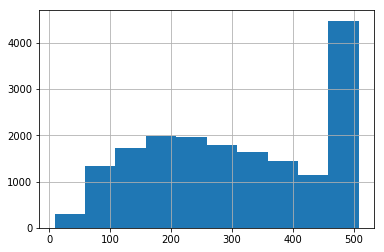

In [21]:
lens.hist()

We find that the length of the text varies.Let us see how the length is distributed for every rating .

c:\users\deepak kumar\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'Length')

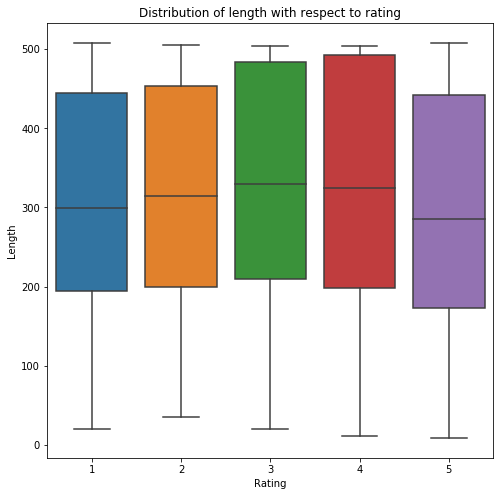

In [28]:
plt.figure(figsize=(8,8))
text['Length']=lens
fx=sns.boxplot(x='Rating',y='Length',data=text)
plt.title("Distribution of length with respect to rating")
plt.xlabel("Rating")
plt.ylabel("Length")

There seems to be a slight difference in the length of the reviews for different rating.

We will now convert the text files into numerical vectors through **Bag of words** model.For this , first we will clean the reviews - remove stopwords as a baseline model.We can also look at removing punctuations,numbers.

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss,confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re


In [124]:
count_vect = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english',max_features=5000)
count_vect.fit(list(train['Review Text'].values.astype('U'))+list(test['Review Text'].values.astype('U')))
xtrain=count_vect.transform(train['Review Text'].values.astype('U'))
xtest=count_vect.transform(test['Review Text'].values.astype('U'))


Now we train naive bayes model on the data and look at the log loss value.

In [134]:
## Applying naive bayes:

model = MultinomialNB()
model.fit(xtrain, ytrain)
predictions = model.predict_proba(xtest)

loss=log_loss(ytest,predictions)
loss

1.5453681134916812